<a href="https://colab.research.google.com/github/RaffyJO/PCVK_Ganjil_2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODUL 6 – Histogram, Histogram Equalization, Dithering**
<br>

Nama : Raffy Jamil Octavialdy
<br>
Kelas : TI - 3D
<br>
NIM : 2241720082

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

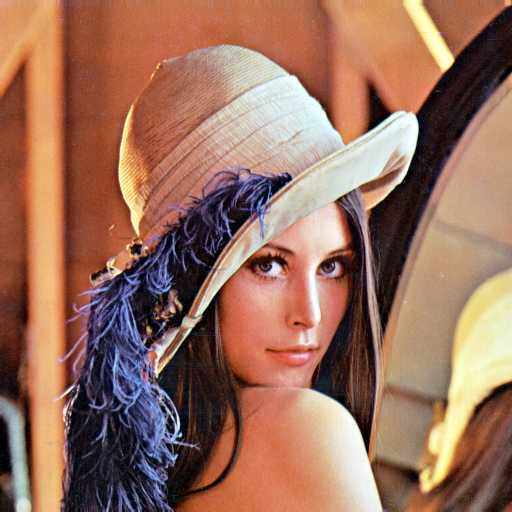

In [3]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
cv2_imshow(img)

Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

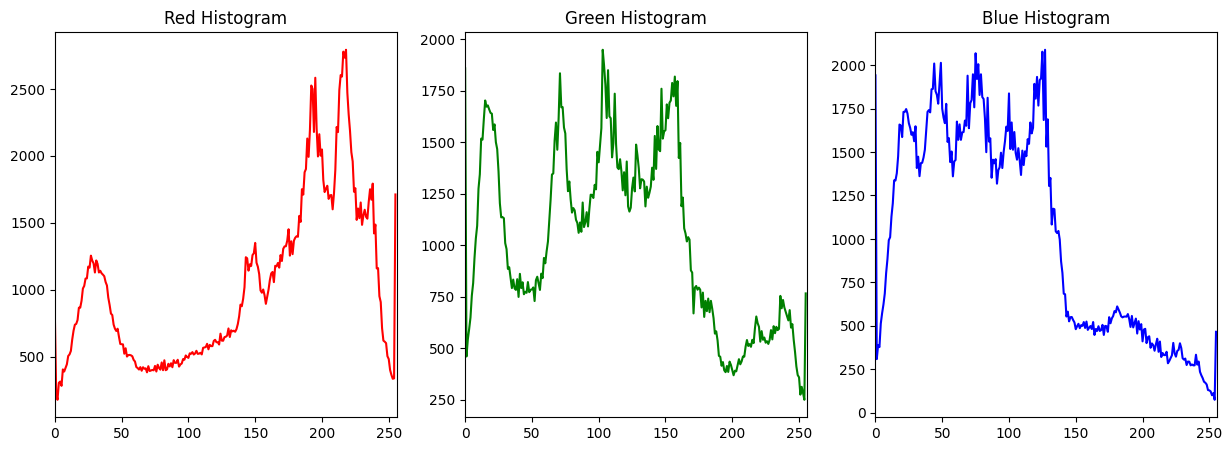

In [4]:
b, g, r = cv.split(img)

hist_b = cv.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv.calcHist([r], [0], None, [256], [0, 256])

plt.figure(figsize=(15, 5))

# Red channel histogram
plt.subplot(131)
plt.plot(hist_r, color='r')
plt.title('Red Histogram')
plt.xlim([0, 256])

# Green channel histogram
plt.subplot(132)
plt.plot(hist_g, color='g')
plt.title('Green Histogram')
plt.xlim([0, 256])

# Blue channel histogram
plt.subplot(133)
plt.plot(hist_b, color='b')
plt.title('Blue Histogram')
plt.xlim([0, 256])

plt.show()

Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?

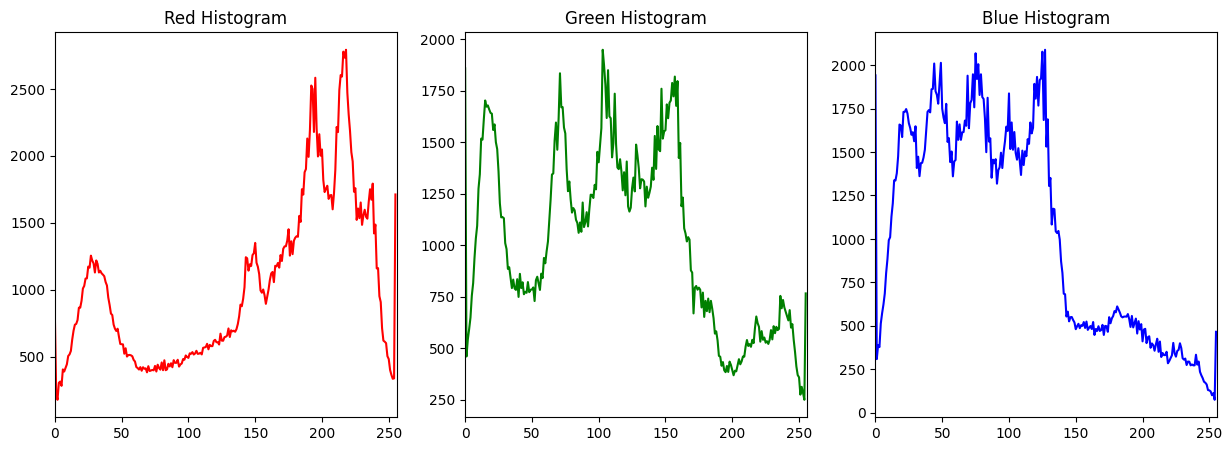

In [5]:
nhist_b = np.histogram(b.ravel(), bins=256, range=(0, 256))
nhist_g = np.histogram(g.ravel(), bins=256, range=(0, 256))
nhist_r = np.histogram(r.ravel(), bins=256, range=(0, 256))

# Create subplots to display the histograms
plt.figure(figsize=(15, 5))

# Red channel histogram
plt.subplot(131)
plt.plot(nhist_r[0], color='r')
plt.title('Red Histogram')
plt.xlim([0, 256])

# Green channel histogram
plt.subplot(132)
plt.plot(nhist_g[0], color='g')
plt.title('Green Histogram')
plt.xlim([0, 256])

# Blue channel histogram
plt.subplot(133)
plt.plot(nhist_b[0], color='b')
plt.title('Blue Histogram')
plt.xlim([0, 256])

plt.show()

Ya hasilnya sama.

Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

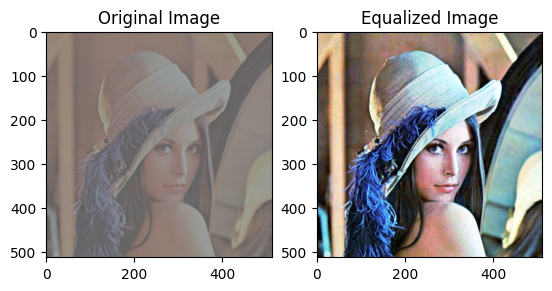

In [10]:
# Baca gambar dan pisahkan channel B, G, R
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
blc, glc, rlc = cv.split(img)

def manual_histogram_equalization(channel):
    # Hitung histogram
    hist, bins = np.histogram(channel.flatten(), 256, [0, 256])

    # Hitung cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Normalisasi CDF (CDF min dijadikan nol)
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())

    # Terapkan pemetaan CDF ke channel
    equalized_channel = cdf_normalized[channel]

    return equalized_channel.astype(np.uint8)

# Ekualisasi manual untuk setiap channel
equalized_blc = manual_histogram_equalization(blc)
equalized_glc = manual_histogram_equalization(glc)
equalized_rlc = manual_histogram_equalization(rlc)

# Gabungkan kembali channel yang sudah di-ekualisasi
equalized_imglc = cv.merge((equalized_blc, equalized_glc, equalized_rlc))

# Tampilkan gambar asli dan hasil ekualisasi
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Untuk tampilan yang benar
equalized_rgb = cv.cvtColor(equalized_imglc, cv.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_rgb)
plt.title('Equalized Image')

plt.show()

Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

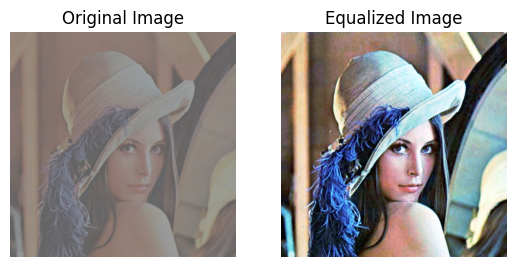

In [14]:
# Baca gambar dan pisahkan channel B, G, R
lena_lc = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

# Pisahkan channel
blc, glc, rlc = cv.split(lena_lc)

# Ekualisasi histogram pada masing-masing channel
equalized_blc = cv.equalizeHist(blc)
equalized_glc = cv.equalizeHist(glc)
equalized_rlc = cv.equalizeHist(rlc)

# Gabungkan kembali channel yang sudah di-ekualisasi
equalized_imglc = cv.merge((equalized_blc, equalized_glc, equalized_rlc))

# Konversi gambar ke format RGB untuk plt.imshow
original_rgb = cv.cvtColor(lena_lc, cv.COLOR_BGR2RGB)
equalized_rgb = cv.cvtColor(equalized_imglc, cv.COLOR_BGR2RGB)

# Tampilkan gambar asli dan gambar yang sudah di-ekualisasi
plt.subplot(1, 2, 1)
plt.imshow(original_rgb)
plt.title('Original Image')
plt.axis('off')  # Hilangkan sumbu untuk tampilan yang lebih baik

plt.subplot(1, 2, 2)
plt.imshow(equalized_rgb)
plt.title('Equalized Image')
plt.axis('off')

plt.show()

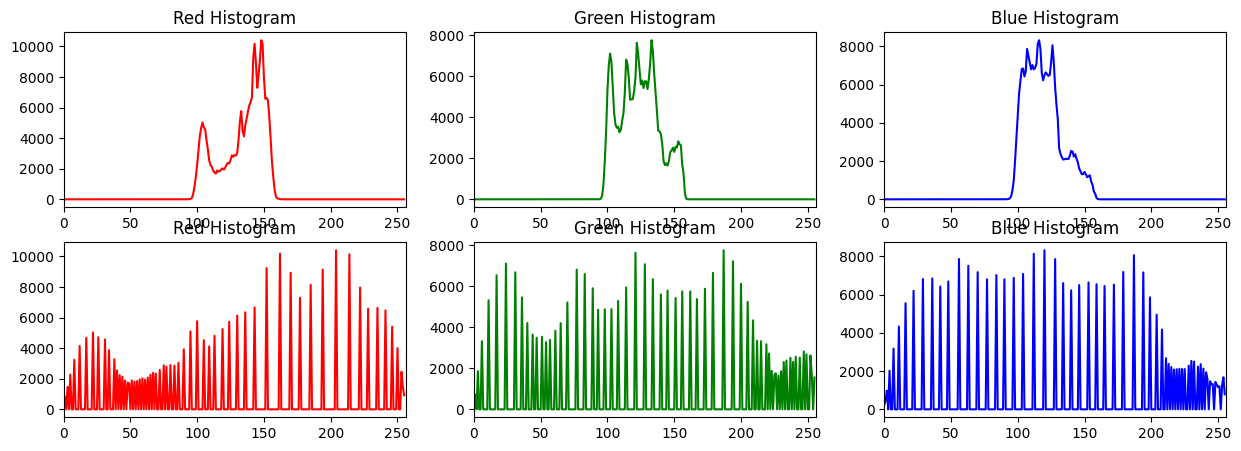

In [15]:
lchist_b = np.histogram(blc.ravel(), bins=256, range=(0, 256))
lchist_g = np.histogram(glc.ravel(), bins=256, range=(0, 256))
lchist_r = np.histogram(rlc.ravel(), bins=256, range=(0, 256))

blch, glch, rlch = cv.split(equalized_imglc)

lchhist_b = np.histogram(blch.ravel(), bins=256, range=(0, 256))
lchhist_g = np.histogram(glch.ravel(), bins=256, range=(0, 256))
lchhist_r = np.histogram(rlch.ravel(), bins=256, range=(0, 256))

# Create subplots to display the histograms
plt.figure(figsize=(15, 5))

# Red channel histogram
plt.subplot(231)
plt.plot(lchist_r[0], color='r')
plt.title('Red Histogram')
plt.xlim([0, 256])

# Green channel histogram
plt.subplot(232)
plt.plot(lchist_g[0], color='g')
plt.title('Green Histogram')
plt.xlim([0, 256])

# Blue channel histogram
plt.subplot(233)
plt.plot(lchist_b[0], color='b')
plt.title('Blue Histogram')
plt.xlim([0, 256])

# histogram equalized
# Red channel histogram
plt.subplot(234)
plt.plot(lchhist_r[0], color='r')
plt.title('Red Histogram')
plt.xlim([0, 256])

# Green channel histogram
plt.subplot(235)
plt.plot(lchhist_g[0], color='g')
plt.title('Green Histogram')
plt.xlim([0, 256])

# Blue channel histogram
plt.subplot(236)
plt.plot(lchhist_b[0], color='b')
plt.title('Blue Histogram')
plt.xlim([0, 256])

plt.show()

Ya hasilnya sama.

Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

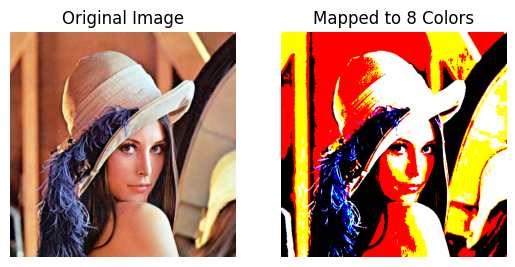

In [16]:
# Baca gambar lena
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# Fungsi untuk memetakan ke dalam 8 warna
def map_to_8_colors(img):
    # Menyalin gambar asli
    img_mapped = img.copy()

    # Proses pemetaan warna
    for i in range(img.shape[0]):  # Looping setiap baris
        for j in range(img.shape[1]):  # Looping setiap kolom
            # Dapatkan nilai RGB asli
            r, g, b = img[i, j]

            # Menerapkan threshold, jika >= 128 maka 255, jika < 128 maka 0
            r = 255 if r >= 128 else 0
            g = 255 if g >= 128 else 0
            b = 255 if b >= 128 else 0

            # Set piksel baru setelah threshold
            img_mapped[i, j] = [r, g, b]

    return img_mapped

# Panggil fungsi untuk memetakan gambar
mapped_img = map_to_8_colors(img)

# Konversi gambar BGR ke RGB untuk plt.imshow
original_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
mapped_rgb = cv.cvtColor(mapped_img, cv.COLOR_BGR2RGB)

# Tampilkan gambar asli dan gambar hasil pemetaan
plt.subplot(1, 2, 1)
plt.imshow(original_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mapped_rgb)
plt.title('Mapped to 8 Colors')
plt.axis('off')

plt.show()

Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

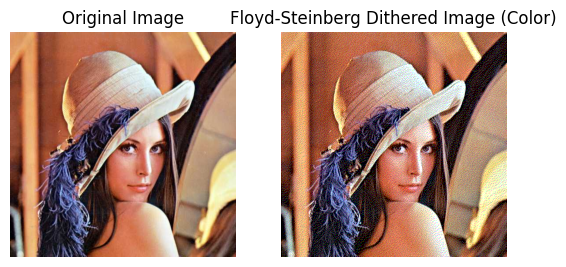

In [18]:
# Baca gambar lena (warna)
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

def floyd_steinberg_dithering_color(img):
    # Pisahkan channel B, G, R dari gambar
    b_channel, g_channel, r_channel = cv.split(img)

    # Terapkan Floyd-Steinberg dithering untuk setiap channel warna
    b_dithered = floyd_steinberg_dithering(b_channel)
    g_dithered = floyd_steinberg_dithering(g_channel)
    r_dithered = floyd_steinberg_dithering(r_channel)

    # Gabungkan kembali channel yang sudah di-dithering
    dithered_img = cv.merge((b_dithered, g_dithered, r_dithered))

    return dithered_img

def floyd_steinberg_dithering(channel):
    # Buat salinan channel
    dithering_img = channel.copy().astype(float)

    # Dapatkan dimensi gambar
    rows, cols = dithering_img.shape

    for i in range(rows):
        for j in range(cols):
            old_pixel = dithering_img[i, j]
            # Lakukan thresholding: jika > 128, set ke 255 (putih), jika tidak set ke 0 (hitam)
            new_pixel = 255 if old_pixel > 128 else 0
            dithering_img[i, j] = new_pixel
            error = old_pixel - new_pixel

            # Sebarkan error ke piksel di sekitarnya berdasarkan Floyd-Steinberg
            if j + 1 < cols:
                dithering_img[i, j + 1] += error * 7 / 16
            if i + 1 < rows:
                if j > 0:
                    dithering_img[i + 1, j - 1] += error * 3 / 16
                dithering_img[i + 1, j] += error * 5 / 16
                if j + 1 < cols:
                    dithering_img[i + 1, j + 1] += error * 1 / 16

    # Pastikan nilai piksel tetap dalam rentang [0, 255]
    dithering_img = np.clip(dithering_img, 0, 255).astype(np.uint8)

    return dithering_img

# Terapkan Floyd-Steinberg dithering untuk gambar berwarna
dithered_img = floyd_steinberg_dithering_color(img)

# Konversi gambar BGR ke RGB untuk plt.imshow
original_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
dithered_rgb = cv.cvtColor(dithered_img, cv.COLOR_BGR2RGB)

# Tampilkan gambar asli dan gambar hasil dithering
plt.subplot(1, 2, 1)
plt.imshow(original_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dithered_rgb)
plt.title('Floyd-Steinberg Dithered Image (Color)')
plt.axis('off')

plt.show()

Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

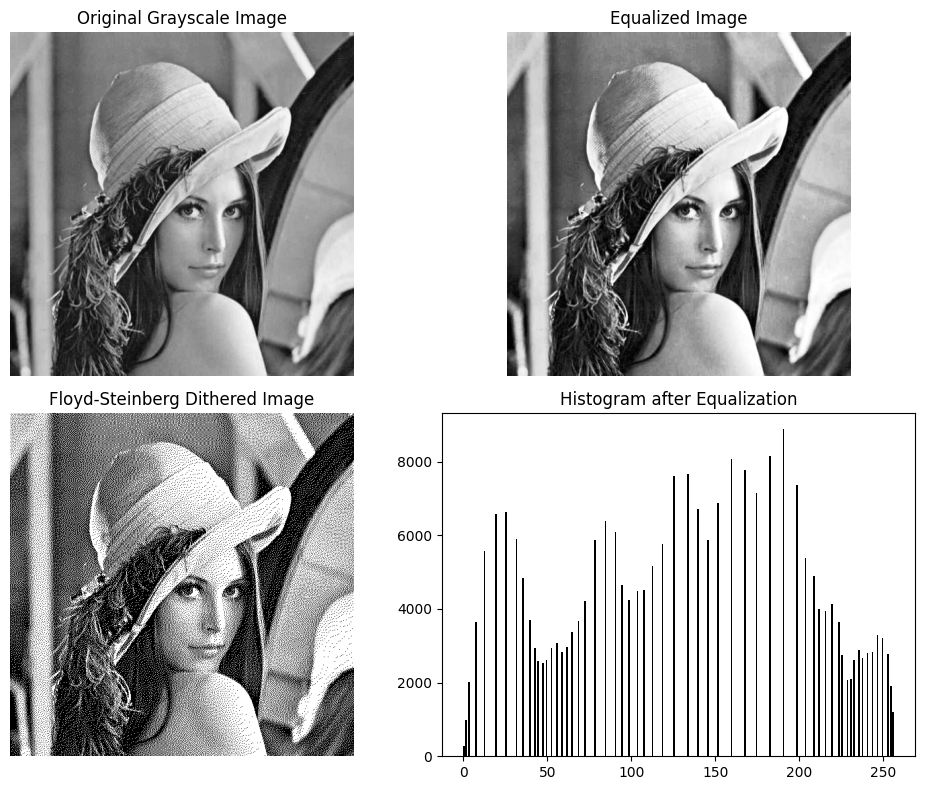

In [19]:
# 1. Baca gambar lena_lc dan konversi ke grayscale
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg', cv.IMREAD_GRAYSCALE)

# 2. Terapkan histogram equalization
equalized_img = cv.equalizeHist(img)

# Fungsi Floyd-Steinberg Dithering
def floyd_steinberg_dithering(img):
    dithering_img = img.copy().astype(float)

    rows, cols = dithering_img.shape

    for i in range(rows):
        for j in range(cols):
            old_pixel = dithering_img[i, j]
            new_pixel = 255 if old_pixel > 128 else 0
            dithering_img[i, j] = new_pixel
            error = old_pixel - new_pixel

            if j + 1 < cols:
                dithering_img[i, j + 1] += error * 7 / 16
            if i + 1 < rows:
                if j > 0:
                    dithering_img[i + 1, j - 1] += error * 3 / 16
                dithering_img[i + 1, j] += error * 5 / 16
                if j + 1 < cols:
                    dithering_img[i + 1, j + 1] += error * 1 / 16

    dithering_img = np.clip(dithering_img, 0, 255).astype(np.uint8)

    return dithering_img

# 3. Terapkan Floyd-Steinberg dithering pada hasil equalized image
dithered_img = floyd_steinberg_dithering(equalized_img)

# 4. Tampilkan hasil gambar
plt.figure(figsize=(10, 8))

# Gambar asli grayscale
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Gambar setelah histogram equalization
plt.subplot(2, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Gambar hasil dithering
plt.subplot(2, 2, 3)
plt.imshow(dithered_img, cmap='gray')
plt.title('Floyd-Steinberg Dithered Image')
plt.axis('off')

# 5. Tampilkan histogram gambar
plt.subplot(2, 2, 4)
plt.hist(equalized_img.flatten(), 256, [0, 256], color='black')
plt.title('Histogram after Equalization')

plt.tight_layout()
plt.show()

In [20]:
!jupyter nbconvert --to html /content/Week6.ipynb

[NbConvertApp] Converting notebook /content/Week6.ipynb to html
[NbConvertApp] Writing 3390198 bytes to /content/Week6.html
